# Instalacao no ocr


In [3]:
!pip install opencv-python==4.6.0.66
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9
!pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 2.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.11.0.86
    Uninstalling opencv-python-4.11.0.86:
      Successfully uninstalled opencv-python-4.11.0.86
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 2.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray-einstats 0.9.1

In [1]:
import pytesseract # biblioteca do teserract da google
import numpy as np # numpy/ numeros
import cv2 # opencv
from google.colab.patches import cv2_imshow # mostrar as imagens no colab

In [2]:
! git clone https://github.com/sthemonica/text-recognize

Cloning into 'text-recognize'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 148 (delta 3), reused 1 (delta 1), pack-reused 144 (from 1)
Receiving objects: 100% (148/148), 37.21 MiB | 35.34 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [3]:
!mkdir tessdata

In [4]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2025-07-14 15:30:20--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata [following]
--2025-07-14 15:30:20--  https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata [following]
--2025-07-14 15:30:20--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.1

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

# Aula 3

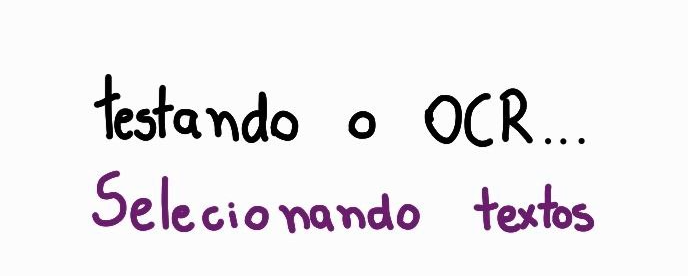

In [6]:
img = cv2.imread('/content/text-recognize/Imagens/Aula3-testando.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [7]:
from pytesseract import Output

In [8]:
config_tesseract = '--tessdata-dir tessdata'
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
print(resultado)

{'level': [1, 2, 3, 4, 5, 5, 5, 4, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 1, 1, 2, 2, 2], 'word_num': [0, 0, 0, 0, 1, 2, 3, 0, 1, 2], 'left': [0, 92, 92, 94, 94, 348, 425, 92, 92, 474], 'top': [0, 74, 74, 74, 74, 111, 88, 171, 171, 184], 'width': [688, 502, 502, 491, 204, 28, 160, 502, 328, 120], 'height': [276, 159, 159, 73, 69, 28, 59, 62, 62, 49], 'conf': ['-1', '-1', '-1', '-1', 63, 90, 48, '-1', 85, 77], 'text': ['', '', '', '', 'Testando', 'o', 'OCR..', '', 'Selecionando', 'textos']}


In [9]:
min_conf = 40 #@param {type: 'slider', min: 0, max: 100}

In [26]:
def caixa_texto(resultado, img, cor = (255, 0, 0)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(img, (x, y), (x+w, y+h), cor, 1)

  return x, y, img

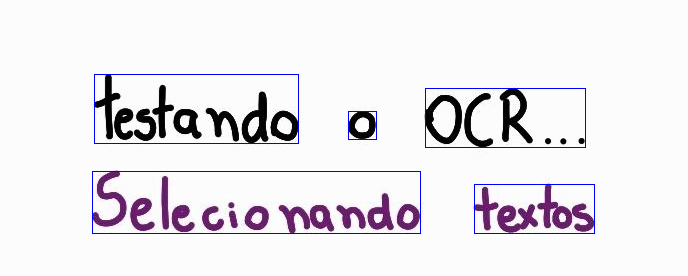

In [27]:
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
cv2_imshow(img_copia)




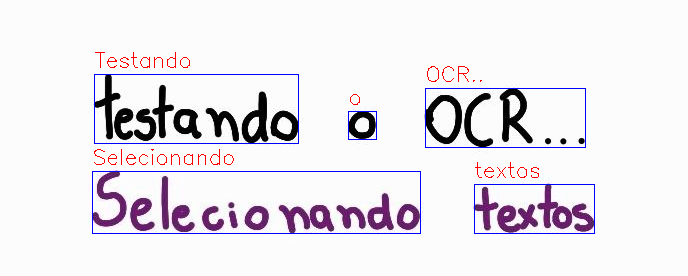

In [28]:
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
    texto = resultado['text'][i]
    cv2.putText(img_copia, texto, (x, y - 7), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255))
cv2_imshow(img_copia)



#Fontes

In [30]:
from PIL import ImageDraw, ImageFont, Image

fonte = '/content/text-recognize/Imagens/calibri.ttf'


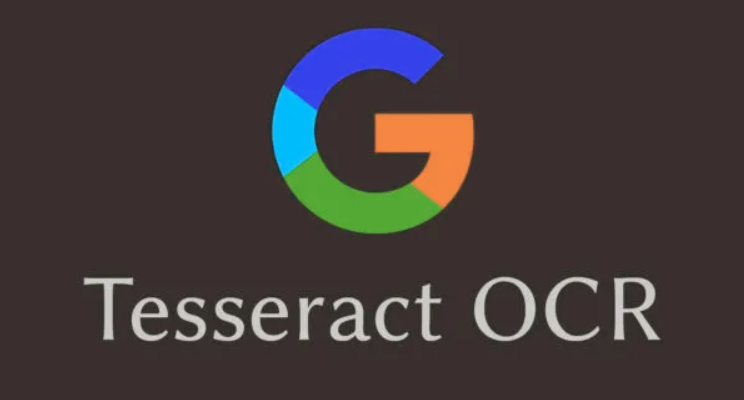

In [35]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-ocr.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [34]:
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
print(resultado)


{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 2], 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 1], 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 2], 'left': [0, 272, 272, 272, 272, 84, 84, 84, 84, 474], 'top': [0, 28, 28, 28, 28, 277, 277, 277, 278, 277], 'width': [744, 202, 202, 202, 202, 576, 576, 576, 357, 186], 'height': [400, 205, 205, 205, 205, 64, 64, 64, 63, 64], 'conf': ['-1', '-1', '-1', '-1', 91, '-1', '-1', '-1', 91, 90], 'text': ['', '', '', '', 'G', '', '', '', 'Tesseract', 'OCR']}


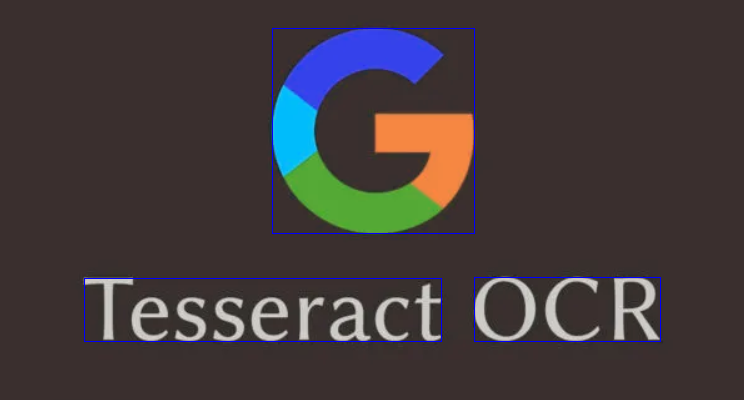

In [36]:
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
cv2_imshow(img_copia)


In [37]:
def escreve_texto(texto, x, y, img, fonte, tamanho_texto=32): # funcao p escrever texto
  fonte = ImageFont.truetype(fonte, tamanho_texto)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho_texto), texto, font = fonte)
  img = np.array(img_pil)
  return img

In [39]:
import os
os.makedirs('images_tesseract', exist_ok=True)

In [40]:
logo_tesseract = '/content/images_tesseract/logo_tesseract.png'

In [41]:
cv2.imwrite(logo_tesseract, img_copia)

True